In [1]:
from dfply import * # https://github.com/kieferk/dfply
import pandas as pd
import numpy as np  
from scipy import stats # http://danielhnyk.cz/fitting-distribution-histogram-using-python/
import matplotlib.pylab as plt

In [2]:
medias_2018 = pd.read_csv("2018-medias-jogadores.csv") # https://github.com/henriquepgomide/caRtola/
medias_2018.head()

,player_slug,player_id,player_nickname,player_team,player_position,price_cartoletas,score_mean,score_no_cleansheets_mean,diff_home_away_s,n_games,...,fouls_mean,RB_mean,PE_mean,A_mean,I_mean,FS_mean,FF_mean,G_mean,DD_mean,DP_mean
0,apodi,51042,Apodi,315,lat,8.68,3.845455,2.481818,0.611605,11,...,2.000000,1.636364,2.272727,0.181818,0.272727,1.000000,0.545455,0.000000,0.0,0.0
1,arthur,80337,Arthur,315,ata,8.66,4.700000,4.700000,0.807618,11,...,2.090909,0.909091,2.000000,0.000000,0.090909,2.181818,1.181818,0.363636,0.0,0.0
2,sidcley,86764,Sidcley,264,lat,14.47,6.070000,4.070000,-2.285324,10,...,0.600000,2.000000,2.200000,0.100000,0.000000,1.000000,0.100000,0.100000,0.0,0.0
3,roger-guedes,89898,Róger Guedes,282,ata,18.04,10.627273,10.627273,1.144901,11,...,1.272727,0.818182,2.181818,0.272727,0.272727,3.363636,1.090909,0.727273,0.0,0.0
4,vinicius-junior,99535,Vinicius Junior,262,ata,15.93,6.609091,6.609091,-2.738273,11,...,0.909091,1.090909,3.000000,0.272727,0.090909,1.909091,0.545455,0.363636,0.0,0.0


In [3]:
medias_2018 = (medias_2018 >> 
               distinct(X.player_id) >> 
               mutate(MLE = X.G_mean / X.shots_x_mean, 
                      gols = X.G_mean * X.n_games, 
                      finalizacoes = X.shots_x_mean * X.n_games) >> 
               select(X.player_nickname, X.player_position, X.MLE, X.gols, X.finalizacoes, X.n_games) >> 
               mask(X.MLE < 1, X.MLE > 0) >>
               arrange(X.MLE, ascending = False))
medias_2018 = medias_2018.dropna()
medias_2018.head(20)

,player_nickname,player_position,MLE,gols,finalizacoes,n_games
274,Manoel,zag,0.500000,1.000000,2.000000,15
104,Jonathan,lat,0.500000,1.000000,2.000000,22
183,Luan,zag,0.500000,2.000000,4.000000,16
139,Matheus Henrique,mei,0.400000,2.000000,5.000000,10
166,Gustavo Gómez,zag,0.400000,2.000000,5.000000,13
185,Jair,mei,0.400000,2.000000,5.000000,13
423,Mateus Gonçalves,ata,0.375000,3.000000,8.000000,14
9,Rodriguinho,mei,0.357143,5.000000,14.000000,10
95,Henrique Dourado,ata,0.352941,6.000000,17.000000,19
143,Danilo,mei,0.333333,2.000000,6.000000,11


(array([4.01859586, 5.46529036, 3.69710819, 3.85785202, 1.76818218,
        0.40185959, 0.96446301, 0.40185959, 0.        , 0.24111575]),
 array([0.01960784, 0.06764706, 0.11568627, 0.16372549, 0.21176471,
        0.25980392, 0.30784314, 0.35588235, 0.40392157, 0.45196078,
        0.5       ]),
 <a list of 10 Patch objects>)

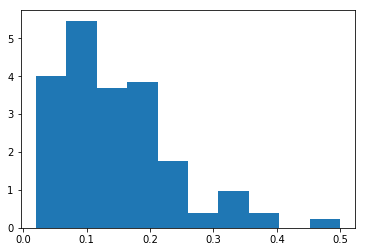

In [4]:
plt.hist(medias_2018.MLE.values, density = True)

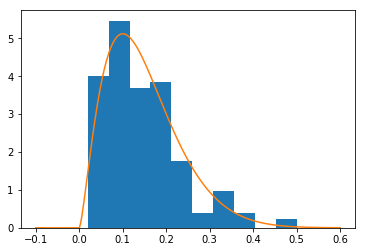

In [5]:
plt.hist(medias_2018.MLE.values, density = True)
a, b, loc, scale = stats.beta.fit(medias_2018.MLE.values, floc = 0, fscale = 1)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(medias_2018.MLE.values))
pdf_beta = stats.beta.pdf(lnspc, a, b, loc, scale) 
plt.plot(lnspc, pdf_beta)
plt.show()

In [6]:
a, b

(2.4571570558924316, 14.102519125075858)

In [7]:
medias_2018 = (medias_2018 >> 
               mutate(media_posteriori = (2.4571570558924316 + X.gols)/
                      (2.4571570558924316 + 14.102519125075858 + X.finalizacoes)) >>
              arrange(X.media_posteriori, ascending = False))

In [8]:
medias_2018.head(20)

,player_nickname,player_position,MLE,gols,finalizacoes,n_games,media_posteriori
95,Henrique Dourado,ata,0.352941,6.000000,17.000000,19,0.252004
9,Rodriguinho,mei,0.357143,5.000000,14.000000,10,0.244020
270,Diego Souza,mei,0.279070,12.000000,43.000000,31,0.242734
389,Deyverson,ata,0.290323,9.000000,31.000000,22,0.240901
246,Jael,ata,0.315789,6.000000,19.000000,20,0.237830
214,Fábio Santos,lat,0.333333,4.242424,12.727273,35,0.228757
189,Gabriel,ata,0.246575,18.000000,73.000000,33,0.228419
423,Mateus Gonçalves,ata,0.375000,3.000000,8.000000,14,0.222200
3,Róger Guedes,ata,0.258065,8.000000,31.000000,11,0.219874
280,Bruno Henrique,mei,0.250000,9.000000,36.000000,33,0.217984


tem coisa errada no Fábio Santos